In [3]:
from datasets import load_dataset

dataset = load_dataset("r1v3r/auto_0207_bug")["train"]


buggy files统计

8.181818181818182
568
1
3


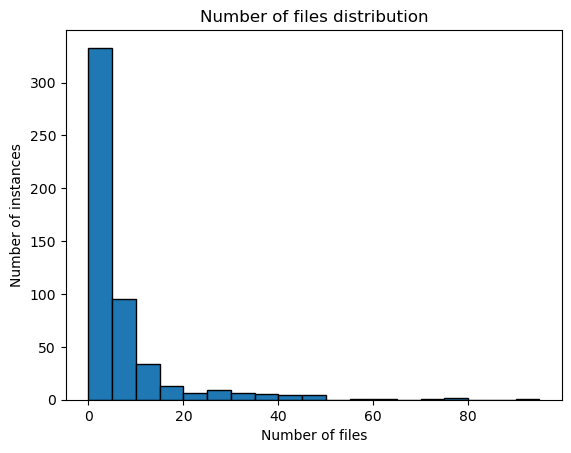

7.096899224806202


In [ ]:
import re
def extract_modified_files(patch_str):
    """
    从git diff格式的补丁字符串中提取所有被修改的文件路径
    
    Args:
        patch_str (str): 包含多个diff块的补丁字符串
    
    Returns:
        list: 所有被修改的文件路径列表
    """
    # 正则表达式匹配diff块的文件路径
    pattern = r'^diff --git a/(?:.*?) b/(\S+)$'
    
    # 使用多行模式匹配所有符合条件的行
    matches = re.finditer(pattern, patch_str, re.MULTILINE)
    
    # 提取文件路径并去除前缀
    files = []
    for match in matches:
        # 提取b/后的路径并去掉前缀
        file_path = match.group(1)
        if file_path.startswith('b/'):
            file_path = file_path[2:]
        files.append(file_path)
    
    return files

res = {}

for example in dataset:
    patch_str = example['patch']
    files = extract_modified_files(patch_str)
    res[example['instance_id']] = files

#计算平均文件数
total = 0
for key in res:
    total += len(res[key])
average = total/len(res)
print(average)

#计算最大文件数
max = 0
for key in res:
    if len(res[key]) > max:
        max = len(res[key])
print(max)

#计算最小文件数
min = 100
for key in res:
    if len(res[key]) < min:
        min = len(res[key])
print(min)

#计算中位数
file_num = []
for key in res:
    file_num.append(len(res[key]))
file_num.sort()
if len(file_num) % 2 == 0:
    median = (file_num[len(file_num)//2] + file_num[len(file_num)//2-1])/2
else:
    median = file_num[len(file_num)//2]
print(median)

#画出文件数分布图
import matplotlib.pyplot as plt

file_num = []
for key in res:
    file_num.append(len(res[key]))

plt.hist(file_num, bins=range(0, 100, 5), edgecolor='black')
plt.xlabel('Number of files')
plt.ylabel('Number of instances')
plt.title('Number of files distribution')
plt.show()

#去掉最大值后的平均文件数
total = 0
for key in res:
    if len(res[key]) != max:
        total += len(res[key])
average = total/(len(res)-1)
print(average)



Generating train split:   0%|          | 0/517 [00:00<?, ? examples/s]

Claude (≥2024-04-01): 130
GPT-4o (≥2023-10-01): 58
GPT-4 (≥2021-09-01): 205


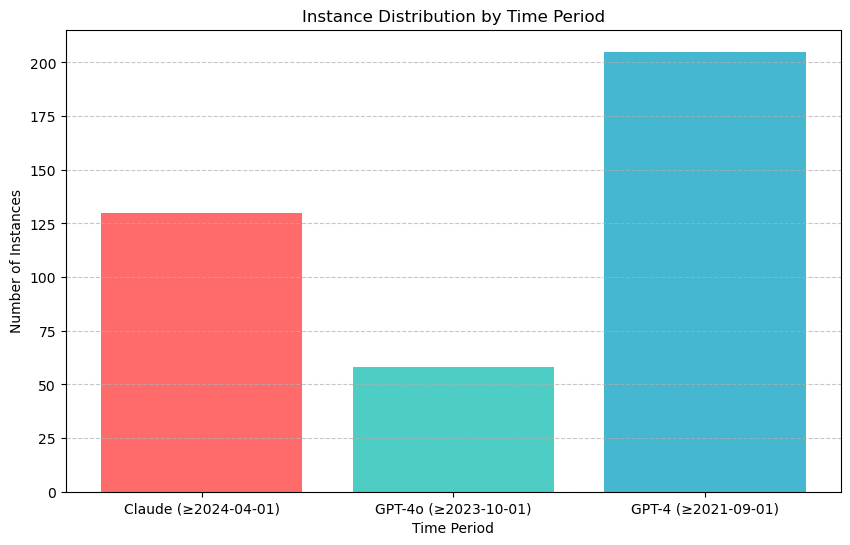

In [18]:
import datetime
import matplotlib.pyplot as plt

# 初始化统计变量
claude = 0
gpt4 = 0
gpt4o = 0

# 定义截止日期并转换为datetime对象
claude_cut_off_date = datetime.datetime.strptime("2024-04-01", "%Y-%m-%d").date()
gpt4_cut_off_date = datetime.datetime.strptime("2021-09-01", "%Y-%m-%d").date()
gpt4o_cut_off_date = datetime.datetime.strptime("2023-10-01", "%Y-%m-%d").date()

dataset = load_dataset("r1v3r/auto_0207_bug_updated")["train"]

# 遍历数据集并统计
for sample in dataset:
    # 提取并解析创建日期
    time_str = sample['created_at'].split('T')[0]
    sample_date = datetime.datetime.strptime(time_str, "%Y-%m-%d").date()
    
    # 按截止日期分层统计（从晚到早判断）
    if sample_date >= claude_cut_off_date:
        claude += 1
    elif sample_date >= gpt4o_cut_off_date:
        gpt4o += 1
    elif sample_date >= gpt4_cut_off_date:
        gpt4 += 1
    # 其他情况（早于所有截止日期）可忽略或单独处理

print(f"Claude (≥2024-04-01): {claude}")
print(f"GPT-4o (≥2023-10-01): {gpt4o}")
print(f"GPT-4 (≥2021-09-01): {gpt4}")
# 可视化分布
labels = ['Claude (≥2024-04-01)', 'GPT-4o (≥2023-10-01)', 'GPT-4 (≥2021-09-01)']
counts = [claude, gpt4o, gpt4]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Instance Distribution by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Instances')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:

lite_dataset = load_dataset("r1v3r/RustGPT_Bench_100", split="train")
# 统计dataset中数据所属的repo
res = {}
for sample in lite_dataset:
    repo = sample['repo']
    if repo not in res:
        res[repo] = 1
    else:
        res[repo] += 1

# 生成带有数量的标签（如：tokio (2)）
labels = [f"{repo} ({count})" for repo, count in res.items()]
sizes = res.values()

# 绘制饼图，禁用百分比显示（autopct=''）
plt.figure(figsize=(10, 10))  # 增大图形尺寸以适应更长的标签
wedges, texts, _ = plt.pie(
    sizes,
    labels=labels,
    autopct='',  # 禁用百分比
    startangle=140,
)

# 调整标签字体大小（由于标签变长，建议适当增大）
plt.setp(texts, fontsize=16)  # 根据实际需求调整字体大小

# 设置标题
plt.title('Repo Distribution', fontsize=14, fontweight='bold')

# 确保图形布局合理
plt.tight_layout()
plt.show()
